## Датасет собран из базы данных переписи 1994 года и содержит данные о доходах.
### Информация о данных:
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, * Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K,<=50K

## Проведите анализ данных при помощи Pandas выполнив поставленные задачи.
#### 

In [1]:
import pandas as pd

In [2]:
# загружаем датасет
data = pd.read_csv("./data/adult.data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Посчитайте, сколько мужчин и женщин (признак *sex*) представлено в этом датасете**

In [25]:
women = data[data.sex == 'Female'].shape[0]
men = data[data.sex == 'Male'].shape[0]
print('There are', women, 'women and', men, 'men in this dataset')

There are 10771 women and 21790 men in this dataset


<AxesSubplot:title={'center':'Pie chart'}, ylabel='gender'>

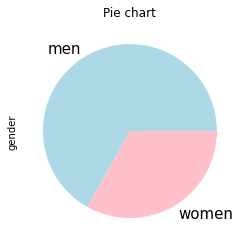

In [26]:
my_labels=['men', 'women']
my_colors=['lightblue', 'pink']
gender = data['sex'].value_counts()
gender.plot.pie(title="Pie chart", fontsize=15, ylabel='gender', labels = my_labels, colors=my_colors)

**2. Каков средний возраст мужчин (признак *age*) по всему датасету?**

In [27]:
mean_age_men = data[data.sex == 'Male']['age'].mean()
print('The mean age for men is', mean_age_men, 'years')

The mean age for men is 39.43354749885268 years


**3. Какова доля граждан Соединенных Штатов (признак *native-country*)?**

In [28]:
usa_citizens = data[data['native-country'] == 'United-States'].shape[0] / data.shape[0]
print('The percentage of USA citizens is', usa_citizens*100, '%')

The percentage of USA citizens is 89.5857006848684 %


**4-5. Рассчитайте среднее значение и среднеквадратичное отклонение возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год**

In [29]:
less50k_mean = data[data['salary']=='<=50K']['age'].mean()
less50k_std = data[data['salary']=='<=50K']['age'].std()
more50k_mean = data[data['salary']=='>50K']['age'].mean()
more50k_std = data[data['salary']=='>50K']['age'].std()

print(less50k_mean, '- mean age of <50k salary workers')
print(less50k_std, '- standard deviation of age of <50k salary workers')
print(more50k_mean, '- mean age of >50k salary workers')
print(more50k_std, '- standard deviation of age of >50k salary workers')

36.78373786407767 - mean age of <50k salary workers
14.020088490824813 - standard deviation of age of <50k salary workers
44.24984058155847 - mean age of >50k salary workers
10.51902771985177 - standard deviation of age of >50k salary workers


**6. Правда ли, что люди, которые получают больше 50k, имеют минимум высшее образование? (признак *education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [30]:
print('Our hypotesis is "people with an income >50K have a high-education". To verify the hypotesis, we should search for high-income people without high-education.')

nongrad_more50k = data[data.education.isin(['Some-college', '11th', 'HS-grad', '9th', '7th-8th', '12th', '1st-4th', '10th', '5th-6th', 'Preschool']) & data.salary.isin(['>50K'])]

print('\nThere are', nongrad_more50k.shape[0], 'people without high-education that earn >50K, so the answer is:')

nongrad_more50k.shape[0] == 0

Our hypotesis is "people with an income >50K have a high-education". To verify the hypotesis, we should search for high-income people without high-education.

There are 3306 people without high-education that earn >50K, so the answer is:


False

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Asian-Pac-Islander*.**

In [31]:
data.groupby(['race', 'sex'])['age'].describe()

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

In [32]:
max_age = data.groupby('race').describe()['age']['max']['Asian-Pac-Islander']
max_age = int(max_age)
print('The oldest asian pacific islander male is', max_age, 'years old')

The oldest asian pacific islander male is 90 years old


**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [33]:
richmarried = len(data.loc[(data['salary'] == '>50K') & (data['sex'] == 'Male') & (data['marital-status'].isin(['Married-civ-spouse', 'Married-spouse-absent','Married-AF-spouse']))])
richsingle = len(data.loc[(data['salary'] == '>50K') & (data['sex'] == 'Male')]) - richmarried 
percentofmarried = richmarried/len(data.loc[(data['salary'] == '>50K')]) 
percentofsingle = richsingle/len(data.loc[(data['salary'] == '>50K')])

if percentofmarried > percentofsingle:
    print('Percent of high-income men higher among married')
elif percentofmarried < percentofsingle:
    print('Percent of high-income men higher among single')
else:
    print('Percent of high-income men is equal in both groups')


Percent of high-income men higher among married


**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [34]:
max_hours = data['hours-per-week'].max()
max_hours_workers = data[data['hours-per-week'] == max_hours]
max_hours_more50k = max_hours_workers[max_hours_workers.salary == '>50K'].shape[0]
percent = (max_hours_workers[max_hours_workers.salary == '>50K'].shape[0] / max_hours_workers.shape[0])*100

print('Maximum hours per week is', max_hours,'hours, and', max_hours_workers.shape[0], 'workers worked this much time.')
print('Among them', max_hours_more50k, 'workers have income >50K and percent of this high-income workers is', round(percent), '%')

Maximum hours per week is 99 hours, and 85 workers worked this much time.
Among them 25 workers have income >50K and percent of this high-income workers is 29 %


**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [35]:
data[(data['salary'] == '>50K')].groupby('native-country').mean()['hours-per-week'].head()

native-country
?           45.547945
Cambodia    40.000000
Canada      45.641026
China       38.900000
Columbia    50.000000
Name: hours-per-week, dtype: float64

In [36]:
data[(data['salary'] == '<=50K')].groupby('native-country').mean()['hours-per-week'].head()

native-country
?           40.164760
Cambodia    41.416667
Canada      37.914634
China       37.381818
Columbia    38.684211
Name: hours-per-week, dtype: float64

**11.Сгруппируйте людей по возрастным группам *young*, *adult*, *retiree*, где:**
* *young* соответствует 16-35 лет
* *adult* - 35-70 лет
* *retiree* - 70-100 лет

**Проставьте название соответсвтуещей группы для каждого человека в новой колонке AgeGroup**

In [41]:
data['age-group'] = pd.cut(x=data['age'], bins=[16, 35, 70, 100], labels=['young', 'adult', 'retiree'])
data['age-group'].head()

0    adult
1    adult
2    adult
3    adult
4    young
Name: age-group, dtype: category
Categories (3, object): ['young' < 'adult' < 'retiree']

<AxesSubplot:title={'center':'Age groups'}>

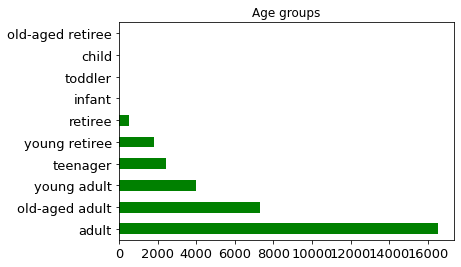

In [33]:
#if we had to create 10 age groups

bins=[0, 1, 4, 12, 20, 25, 45, 60, 70, 90, 120]
labels=['infant', 'toddler', 'child', 'teenager', 'young adult', 'adult', 'old-aged adult', 'young retiree', 'retiree', 'old-aged retiree']
data['age-group-10'] = pd.cut(x=data['age'], bins=bins, labels=labels)
data['age-group-10'].value_counts().plot.barh(title='Age groups', fontsize=13, color='green')

**12-13. Определите количество зарабатывающих >50K в каждой из возрастных групп (колонка AgeGroup), а также выведите название возрастной группы, в которой чаще зарабатывают больше 50К (>50K)**

In [27]:
age_salary = data[data.salary == '>50K'].groupby(['age-group-10']).size()
print(age_salary)
print ('\nThe most prevalent high-income group is:', age_salary.idxmax())

age-group-10
infant                 0
toddler                0
child                  0
teenager               2
young adult          112
adult               4365
old-aged adult      2811
young retiree        457
retiree               94
old-aged retiree       0
dtype: int64

The most prevalent high-income group is: adult


<AxesSubplot:title={'center':'Number of high-income persons in every age groups'}, ylabel='age-group-10'>

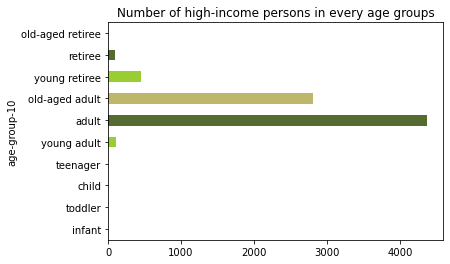

In [32]:
mycolors=['DarkKhaki','#9ACD32','DarkOliveGreen','green','gray']
age_salary.plot.barh(color = {'DarkOliveGreen', 'DarkKhaki', '#9ACD32'}, title='Number of high-income persons in every age groups')

**14. Сгруппируйте людей по типу занятости (колонка occupation) и определите количество людей в каждой группе. После чего напишите функциюю фильтрации filter_func, которая будет возвращать только те группы, в которых средний возраст (колонка age) не больше 40 и в которых все работники отрабатывают более 5 часов в неделю (колонка hours-per-week)**

In [5]:
data['occupation'].value_counts().head()

Prof-specialty     4140
Craft-repair       4099
Exec-managerial    4066
Adm-clerical       3770
Sales              3650
Name: occupation, dtype: int64

<AxesSubplot:title={'center':'Occupation'}>

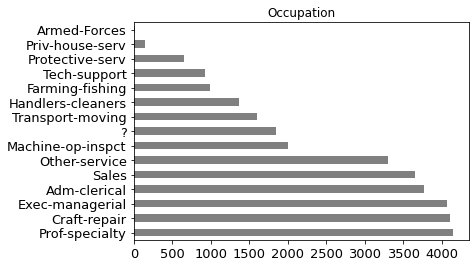

In [6]:
occ = data['occupation'].value_counts()
occ.plot.barh(title='Occupation', fontsize=13, color='grey')

In [27]:
groupedby_occ = data.groupby('occupation')

def filter_func(group):
    return (group['age'].mean() < 40) & (group['hours-per-week'].min() > 5)
groupedby_occ.filter(filter_func).head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,age-group
442,24,Federal-gov,191073,HS-grad,9,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,<=50K,young
1300,29,Federal-gov,301010,Some-college,10,Never-married,Armed-Forces,Not-in-family,Black,Male,0,0,60,United-States,<=50K,young
14613,39,Federal-gov,227597,HS-grad,9,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,50,United-States,<=50K,adult
16111,24,Federal-gov,287988,Bachelors,13,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,40,United-States,<=50K,young
18034,34,Federal-gov,172716,12th,8,Married-civ-spouse,Armed-Forces,Husband,White,Male,0,0,40,United-States,<=50K,young
